In [2]:
import numpy as np
import torch
import torch.nn as nn
from torch import optim as optim
import matplotlib.pyplot as plt

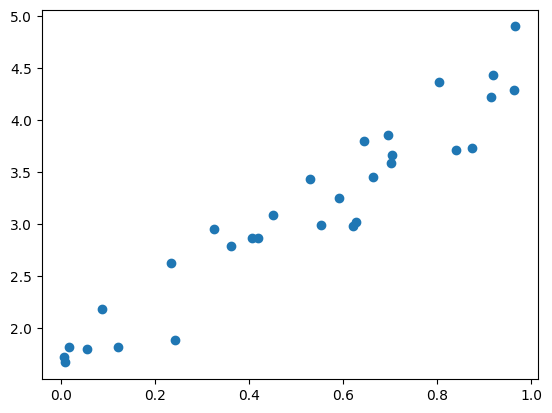

In [33]:
# creating data
torch.manual_seed(69)
N = 30
actual_w = 3.0
actual_b = 1.0

X = torch.rand(N, 1)

e = torch.rand(N, 1) + 0.1

y = actual_w *X + actual_b + e

plt.scatter(X, y)


Model training with sgd optimizer manually

In [34]:
# random w and b to start with

torch.manual_seed(42)
EPOCHS = 300
lr = 0.1

w = torch.rand(1, requires_grad=True, dtype=torch.float)
b = torch.rand(1, requires_grad=True, dtype=torch.float)

print('***** initial w, b  ********')
print(w, b)

optimizer = optim.SGD([w, b], lr=lr)

for i in range(EPOCHS):
    
    y_pred = w * X + b

    delta = y_pred - y

    loss = (delta ** 2).mean()

    loss.backward()

    optimizer.step()  # updates weight and bias

    optimizer.zero_grad()

w, b
    


***** initial w, b  ********
tensor([0.8823], requires_grad=True) tensor([0.9150], requires_grad=True)


(tensor([2.7880], requires_grad=True), tensor([1.7020], requires_grad=True))

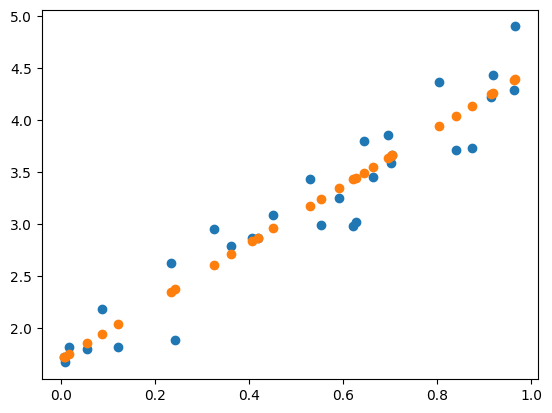

In [35]:
# using learned w and b to predict y from X

y_pred = w * X + b
plt.scatter(X, y)
plt.scatter(X, y_pred.detach().numpy())
plt.show()

### Now, using pytorch inbuild MSE insted of doing it manually

In [37]:
torch.manual_seed(42)
EPOCHS = 300
lr = 0.1

w = torch.rand(1, requires_grad=True, dtype=torch.float)
b = torch.rand(1, requires_grad=True, dtype=torch.float)

optimizer = optim.SGD([w,b], lr=lr)

MSE = nn.MSELoss(reduction='mean')

for i in range(EPOCHS):
    y_pred = w * X + b
    loss = MSE(y_pred, y)
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()
w, b

(tensor([2.7880], requires_grad=True), tensor([1.7020], requires_grad=True))

### Pytorch Workflow (without using inbuilt layers for now )

In [58]:
class MyLinearRegression(nn.Module):

    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
        self.b = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, X):
        return self.w * X + self.b


torch.manual_seed(69)
EPOCHS = 300
lr = 0.1

model = MyLinearRegression()

optimizer = optim.SGD(model.parameters(), lr=lr)

MSE = nn.MSELoss(reduction='mean')

for i in range(EPOCHS):
    y_pred = model(X)

    loss = MSE(y_pred, y)

    loss.backward()

    optimizer.step()

    optimizer.zero_grad()

model.state_dict()

OrderedDict([('w', tensor([2.7881])), ('b', tensor([1.7019]))])

###  using nn.Linear

In [69]:
class MyLinearRegression(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1,1)
        
    def forward(self, X):
        return self.fc(X)

        
torch.manual_seed(69)
EPOCHS = 300
lr = 0.1

model = MyLinearRegression()

optimizer = optim.SGD(model.parameters(), lr=lr)

MSE = nn.MSELoss(reduction='mean')

for i in range(EPOCHS):
    y_pred = model(X)

    loss = MSE(y_pred, y)

    loss.backward()

    optimizer.step()

    optimizer.zero_grad()

model.state_dict()

OrderedDict([('fc.weight', tensor([[2.7876]])), ('fc.bias', tensor([1.7022]))])